In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append("/Users/edwardlrichards/swellEx")
import loadCSDM as cm

In [2]:
dataFile = '/Users/edwardlrichards/swellEx/data/J1312315.vla.21els.sio'
positionFile = '/Users/edwardlrichards/swellEx/data/positions_vla.txt'
channelDepth = pd.read_csv(positionFile, sep='\t', names = ['channel', 'depth'])

fs = 1500
tStart = 2000
snapLength = 1
snapStep = 0.5

dataIter = cm.SnapshotLoad(dataFile, fs, tStart, snapLength, snapStep,
                          channelNames = channelDepth['depth'][::-1])
processingFunction = cm.NarrowBandPressure(49)

In [3]:
tom = dataIter.__next__()

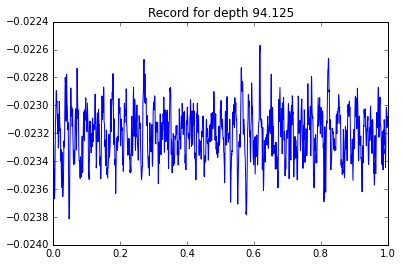

In [4]:
_ = plt.plot(tom.index, tom.iloc[:,0])
_ = plt.title('Record for depth ' + str(tom.columns[0]))

In [5]:
kGen = cm.CSDM(dataIter, processingFunction)

In [6]:
K = kGen(20)
X, Y = np.meshgrid(K.iloc[0].index, K.iloc[0].columns)
_ = plt.pcolormesh(X, Y, np.array(np.abs(K.iloc[0])))
_ = plt.colorbar()

In [7]:
# while True:
#     K = kGen(20)

In [8]:
dataIter = cm.SnapshotLoad(dataFile, fs, tStart, snapLength, snapStep,
                          channelNames = channelDepth['depth'][::-1])
processingFunction = cm.NarrowBandPressure([49, 64])
kGen = cm.CSDM(dataIter, processingFunction)

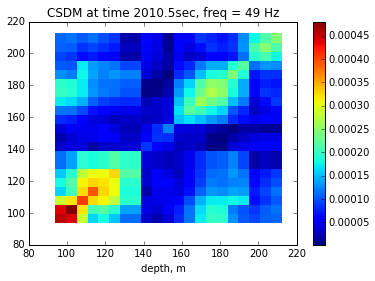

In [9]:
K = kGen(20)
X, Y = np.meshgrid(K.iloc[0].index, K.iloc[0].columns)
_ = plt.pcolormesh(X, Y, np.array(np.abs(K.iloc[0])))
_ = plt.colorbar()
_ = plt.title('CSDM at time ' + str(K.iloc[0].index.name) +'sec, freq = '\
             + str(K.index[0]) + ' Hz')
_ = plt.xlabel('depth, m')

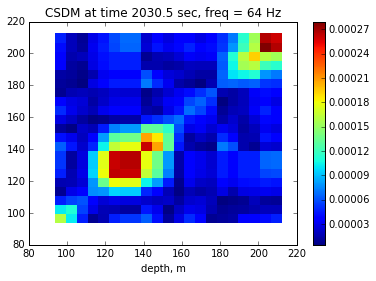

In [10]:
K = kGen(20)
X, Y = np.meshgrid(K.iloc[1].index, K.iloc[1].columns)
_ = plt.pcolormesh(X, Y, np.array(np.abs(K.iloc[1])))
_ = plt.colorbar()
_ = plt.title('CSDM at time ' + str(K.iloc[1].index.name) +' sec, freq = '\
             + str(K.index[1]) + ' Hz')
_ = plt.xlabel('depth, m')